# Potato Disease Classification

### Import all the Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.7845301  0.74139285 0.76492226]
  [0.78378904 0.7406518  0.7641812 ]
  [0.783048   0.7399107  0.76344013]
  ...
  [0.8256394  0.7825022  0.79818845]
  [0.8049903  0.76185304 0.7775393 ]
  [0.78823537 0.74509805 0.7607844 ]]

 [[0.78823537 0.74509805 0.7686275 ]
  [0.78823537 0.74509805 0.7686275 ]
  [0.78823537 0.74509805 0.7686275 ]
  ...
  [0.8237868  0.7806495  0.79633576]
  [0.80276704 0.7596298  0.77531606]
  [0.78823537 0.74509805 0.7607844 ]]

 [[0.78823537 0.74509805 0.7686275 ]
  [0.78823537 0.74509805 0.7686275 ]
  [0.78823537 0.74509805 0.7686275 ]
  ...
  [0.82193404 0.7787968  0.79448307]
  [0.8005438  0.75740653 0.7730928 ]
  [0.78823537 0.74509805 0.7607844 ]]

 ...

 [[0.6313726  0.57254905 0.5921569 ]
  [0.6415745  0.582751   0.6023588 ]
  [0.6728067  0.61398315 0.633591  ]
  ...
  [0.6335993  0.5708542  0.5826189 ]
  [0.63619304 0.57344794 0.58521265]
  [0.6387868  0.5760417  0.5878064 ]]

 [[0.6313726  0.57254905 0.5921569 ]
  [0.64453876 0.58571523 0.6053231 ]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.52491933 0.50923306 0.564135  ]
  [0.52507335 0.5093871  0.56428903]
  [0.52522737 0.5095411  0.56444305]
  ...
  [0.5238138  0.51597065 0.56695104]
  [0.5019721  0.4941289  0.54510933]
  [0.4879691  0.48012596 0.53110635]]

 [[0.5192971  0.50361085 0.5585128 ]
  [0.5199132  0.5042269  0.5591289 ]
  [0.5205292  0.50484294 0.5597449 ]
  ...
  [0.5242758  0.51643264 0.5674131 ]
  [0.500894   0.49305087 0.54403126]
  [0.48750708 0.47966394 0.53064436]]

 [[0.50644726 0.49076095 0.54566294]
  [0.50629324 0.49060696 0.5455089 ]
  [0.5061392  0.49045298 0.5453549 ]
  ...
  [0.5247379  0.51689476 0.56787515]
  [0.49981597 0.49197283 0.54295325]
  [0.48704508 0.47920194 0.53018236]]

 ...

 [[0.77619994 0.7683568  0.8193372 ]
  [0.7571035  0.74926037 0.80024076]
  [0.71815884 0.7103157  0.7612961 ]
  ...
  [0.6041505  0.59630734 0.6512093 ]
  [0.6044055  0.5965624  0.65146434]
  [0.60517555 0.5973324  0.6522344 ]]

 [[0.77592623 0.7680831  0.8190635 ]
  [0.7558042  0.74796104 0.79894143]


## Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=5,
)

Epoch 1/5
47/47 [==============================] - 77s 2s/step - loss: 0.9661 - accuracy: 0.4525 - val_loss: 0.8986 - val_accuracy: 0.6354
Epoch 2/5
47/47 [==============================] - 117s 3s/step - loss: 0.8513 - accuracy: 0.5360 - val_loss: 0.7684 - val_accuracy: 0.6250
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.7314 - accuracy: 0.6716 - val_loss: 0.6153 - val_accuracy: 0.7396
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.4428 - accuracy: 0.8189 - val_loss: 0.3701 - val_accuracy: 0.8229
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.3430 - accuracy: 0.8589 - val_loss: 0.3363 - val_accuracy: 0.8646


In [18]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 7s 522ms/step - loss: 0.3248 - accuracy: 0.8585


In [19]:
scores

[0.3247511386871338, 0.8584686517715454]

### Plotting the Accuracy and Loss Curves

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

5

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9661188721656799,
 0.8513345122337341,
 0.7314030528068542,
 0.44279488921165466,
 0.3429611325263977]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.6354166865348816,
 0.625,
 0.7395833134651184,
 0.8229166865348816,
 0.8645833134651184]

In [28]:
acc

[0.45251017808914185,
 0.5359565615653992,
 0.6716417670249939,
 0.8188602328300476,
 0.8588873744010925]

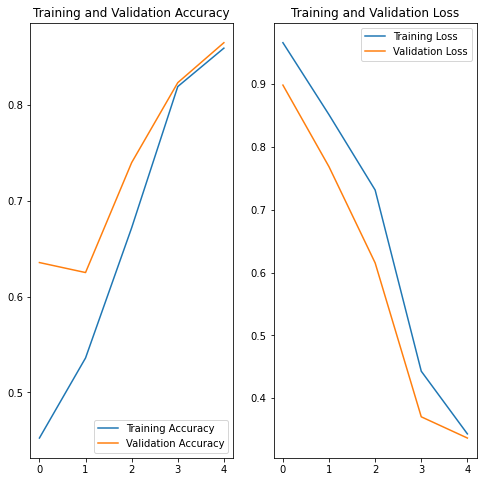

In [29]:
EPOCHS = 5

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


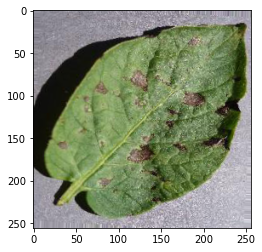

In [30]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Saving the Model

In [71]:
model.save("../potatoes.h5")

In [ ]:
import os
model_version = max([int(i) for i in (os.listdir("../models")+[0])]) + 1
model.save(f"../models/{model_version}")